# Introduction

**Base learners** - a model that is slightly better than a coin toss. XGBoost uses decision trees as the base learner. A **decision stump** is a shallow decision tree with little branching.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [10]:
data = pd.read_csv("data/titanic.csv")
data = data[['Pclass', 'Sex', 'Age', 'Survived']]
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = data.dropna()
data.head()

,Pclass,Sex,Age,Survived
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,1
3,1,1,35.0,1
4,3,0,35.0,0


In [11]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.68%


# Scoring XGBoost models

In [20]:
from numpy import loadtxt

dataset = loadtxt('data/pima.txt', delimiter=",")
X = dataset[:,0:8] 
Y = dataset[:,8]

seed = 7 
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) 

model = XGBClassifier() 
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred] 

accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.92%


 Take note that the parameter has been added. The parameter is early_stopping_rounds=36

In [28]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

eval_set = [(X_test, y_test)] 
model.fit(X_train, y_train, eval_metric="error",early_stopping_rounds=36, eval_set=eval_set, verbose=True)
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred] 

accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.25974
Will train until validation_0-error hasn't improved in 36 rounds.
[1]	validation_0-error:0.25974
[2]	validation_0-error:0.25974
[3]	validation_0-error:0.25974
[4]	validation_0-error:0.233766
[5]	validation_0-error:0.242424
[6]	validation_0-error:0.255411
[7]	validation_0-error:0.238095
[8]	validation_0-error:0.233766
[9]	validation_0-error:0.238095
[10]	validation_0-error:0.238095
[11]	validation_0-error:0.233766
[12]	validation_0-error:0.238095
[13]	validation_0-error:0.238095
[14]	validation_0-error:0.242424
[15]	validation_0-error:0.233766
[16]	validation_0-error:0.229437
[17]	validation_0-error:0.229437
[18]	validation_0-error:0.229437
[19]	validation_0-error:0.229437
[20]	validation_0-error:0.229437
[21]	validation_0-error:0.229437
[22]	validation_0-error:0.238095
[23]	validation_0-error:0.225108
[24]	validation_0-error:0.212121
[25]	validation_0-error:0.220779
[26]	validation_0-error:0.220779
[27]	validation_0-error:0.212121
[28]	validation_0-error:

# Saving the trained model

In [29]:
import pickle 

pickle.dump(model, open("production_pima_model.dat", "wb"))

In [31]:
loaded_model = pickle.load(open("production_pima_model.dat", "rb")) 
y_pred = loaded_model.predict(X_test) 
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.22%


# Selecting features in gradient boosting

In [32]:
print(model.feature_importances_)

[0.1030869  0.2586743  0.07711612 0.06305027 0.09934872 0.17890204
 0.09226437 0.1275573 ]


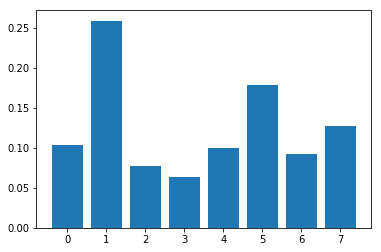

In [35]:
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_) 
pyplot.show()

- 0 - Pregnancies: Number of times pregnant
- 1 - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- 2 - BloodPressure: Diastolic blood pressure (mm Hg)
- 3 - SkinThicknessTriceps: Skin fold thickness (mm)
- 4 - Insulin: 2-Hour serum insulin (mu U/ml)
- 5 - BMIBody: mass index (weight in kg/(height in m)^2)
- 6 - DiabetesPedigreeFunctionDiabetes: pedigree function
- 7 - AgeAge: (years)
- 8 - OutcomeClass: variable (0 or 1)

In [37]:
from sklearn import datasets
iris = datasets.load_iris()
feat_labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
model = XGBClassifier() 
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
# Print the name and gini importance of each feature
for feature in zip(feat_labels, model.feature_importances_):
    print(feature)

('Sepal Length', 0.016870115)
('Sepal Width', 0.02123037)
('Petal Length', 0.7144931)
('Petal Width', 0.24740641)


In [40]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold=0.25)
sfm.fit(X_train, y_train)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [41]:
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Petal Length


In [42]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

clf_important = XGBClassifier()
clf_important.fit(X_important_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)